In [1]:
%cd ..

e:\End-to-End MLOps Pipeline With GitHub Actions


# 1)import libraries

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

import joblib

##2) Read Data

In [3]:
data=pd.read_csv(r'data\ml_datasource.csv')

- copy of raw data

In [4]:
df=data.copy()

- diplay 5 first rows

In [5]:
df.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


# 2) Data Preprocessing

### **Outliers**

In [6]:
df.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000
mean,123.205112,31.082906,1.196442,0.277800,0.176341,1.242772,0.091830
std,90.675102,90.593660,0.646788,1.659998,1.099900,7.755386,0.288795
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,6.800000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,204.000000,34.300000,1.000000,0.000000,0.000000,0.000000,0.000000
max,292.000000,5312.300000,16.000000,76.000000,63.000000,457.410000,1.000000


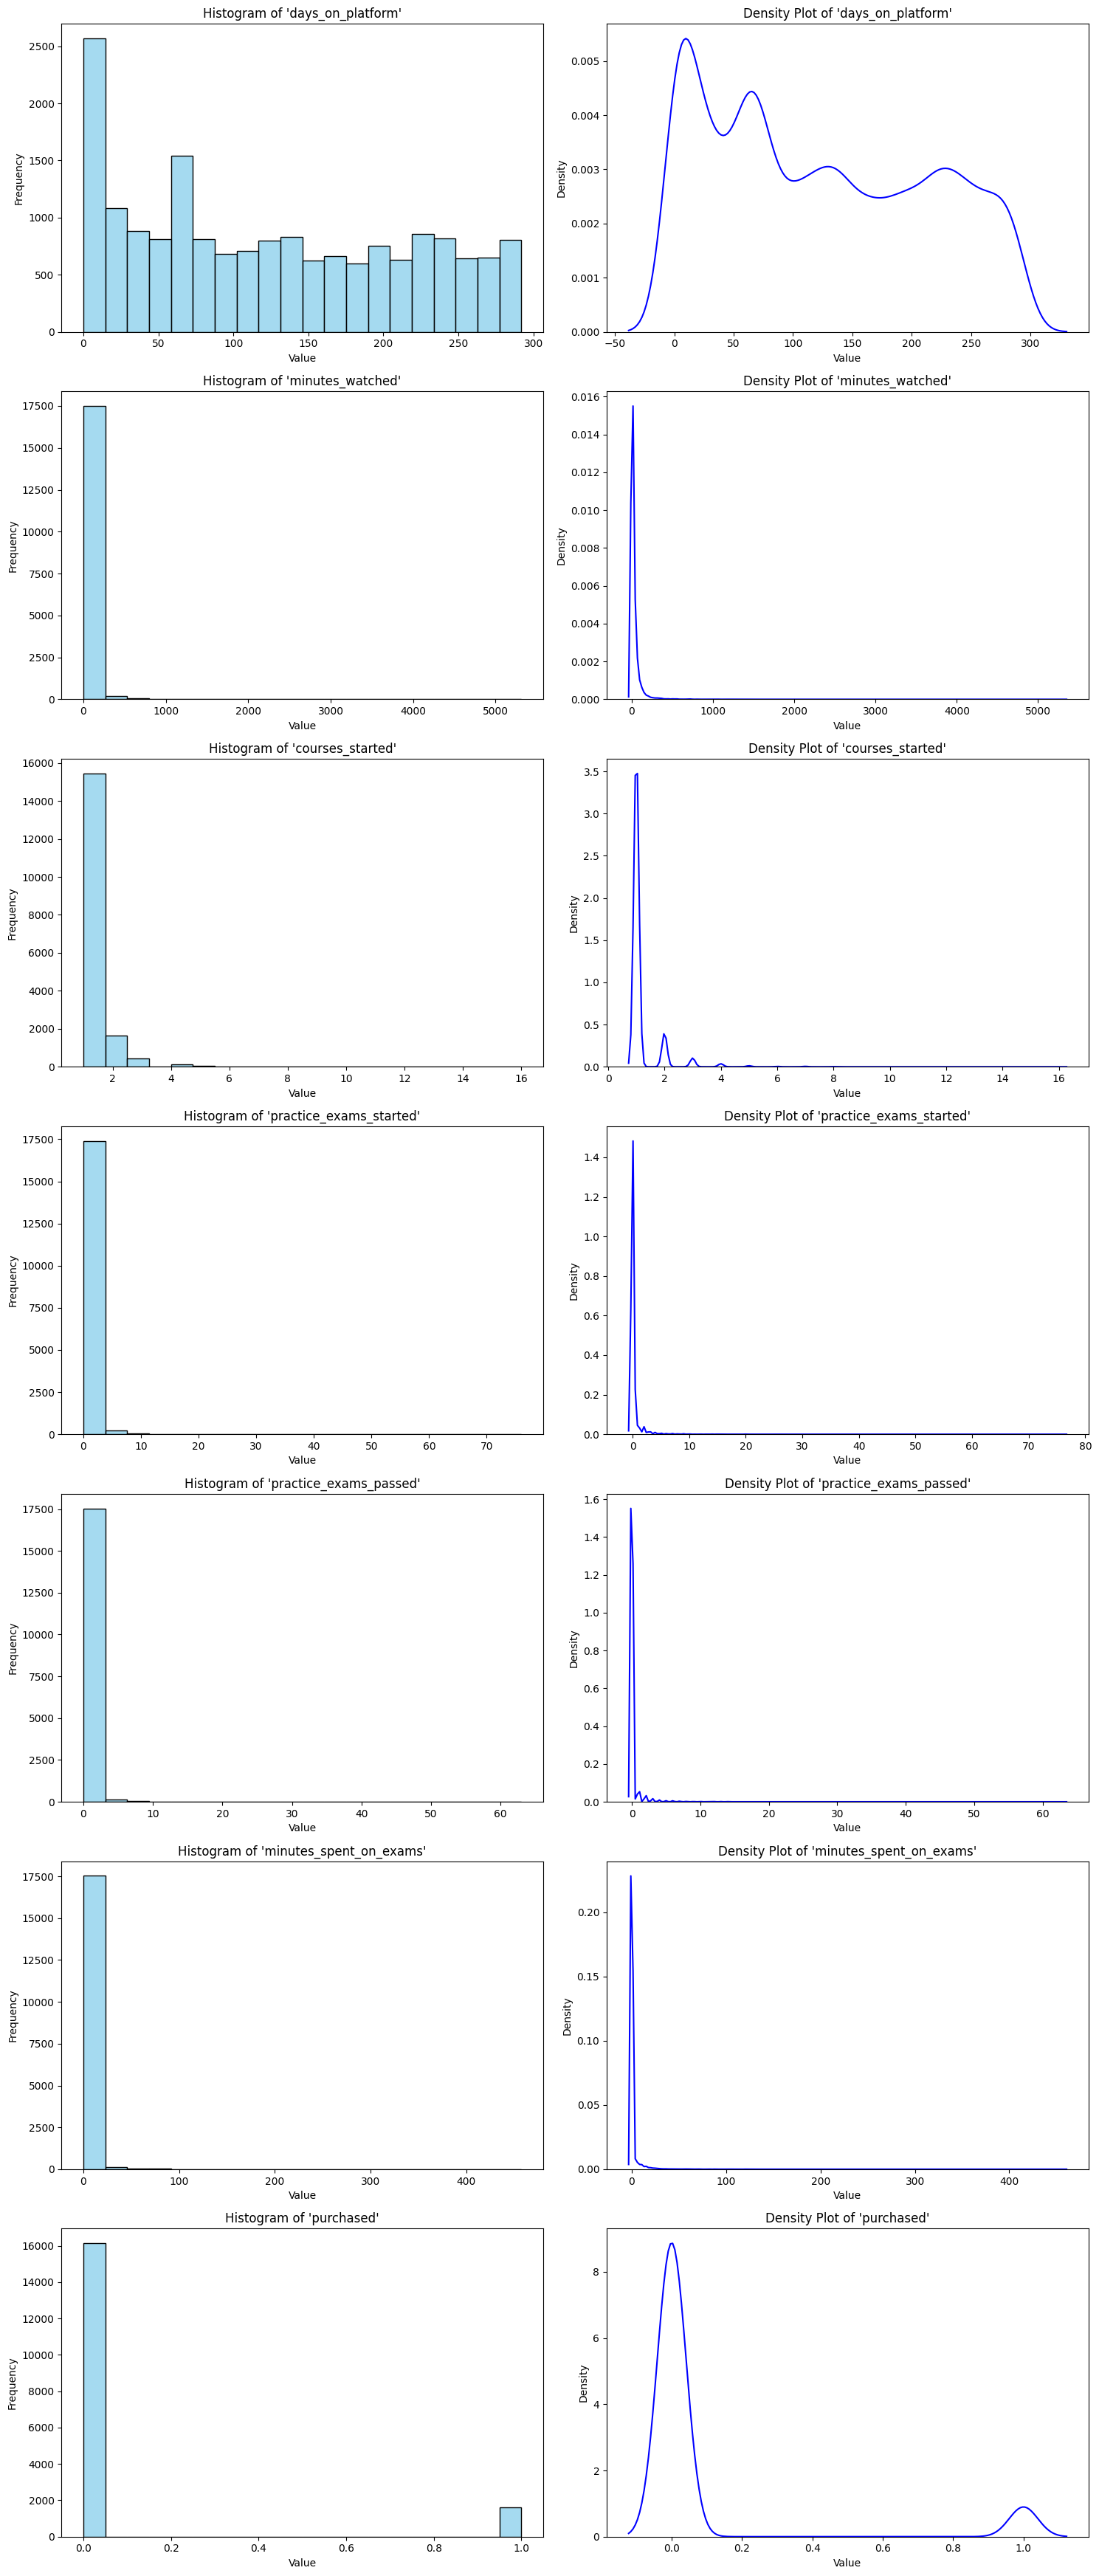

In [7]:
# Filter only numerical columns

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size

plt.figure(figsize=(15, len(numerical_features) * 5))

# Plot histograms and density plots for each numerical column after removing outliers

for i, feature in enumerate(numerical_features, 1):

    #Histogram

    plt.subplot(len(numerical_features), 2, 2 * i - 1)

    sns.histplot(df[feature], bins=20, kde=False, color='skyblue')

    plt.title(f"Histogram of '{feature}'")

    plt.xlabel("Value")

    plt.ylabel("Frequency")



    # Density Plot

    plt.subplot(len(numerical_features), 2, 2 * i)

    sns.kdeplot(df[feature], color='blue')

    plt.title(f"Density Plot of '{feature}'")

    plt.xlabel("Value")

    plt.ylabel("Density")

plt.tight_layout()

plt.show()

In [8]:
df=df[df['minutes_watched']<=1000]

df=df[df['practice_exams_started']<=10]

df=df[df['practice_exams_passed']<=10]

df=df[df['minutes_spent_on_exams']<=40]

df.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000
mean,123.472150,27.195292,1.179977,0.183381,0.119002,0.780315,0.092116
std,90.773953,56.449325,0.587557,0.817172,0.588637,3.481674,0.289197
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,41.250000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,6.700000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,204.000000,33.400000,1.000000,0.000000,0.000000,0.000000,0.000000
max,292.000000,994.200000,16.000000,10.000000,9.000000,40.000000,1.000000


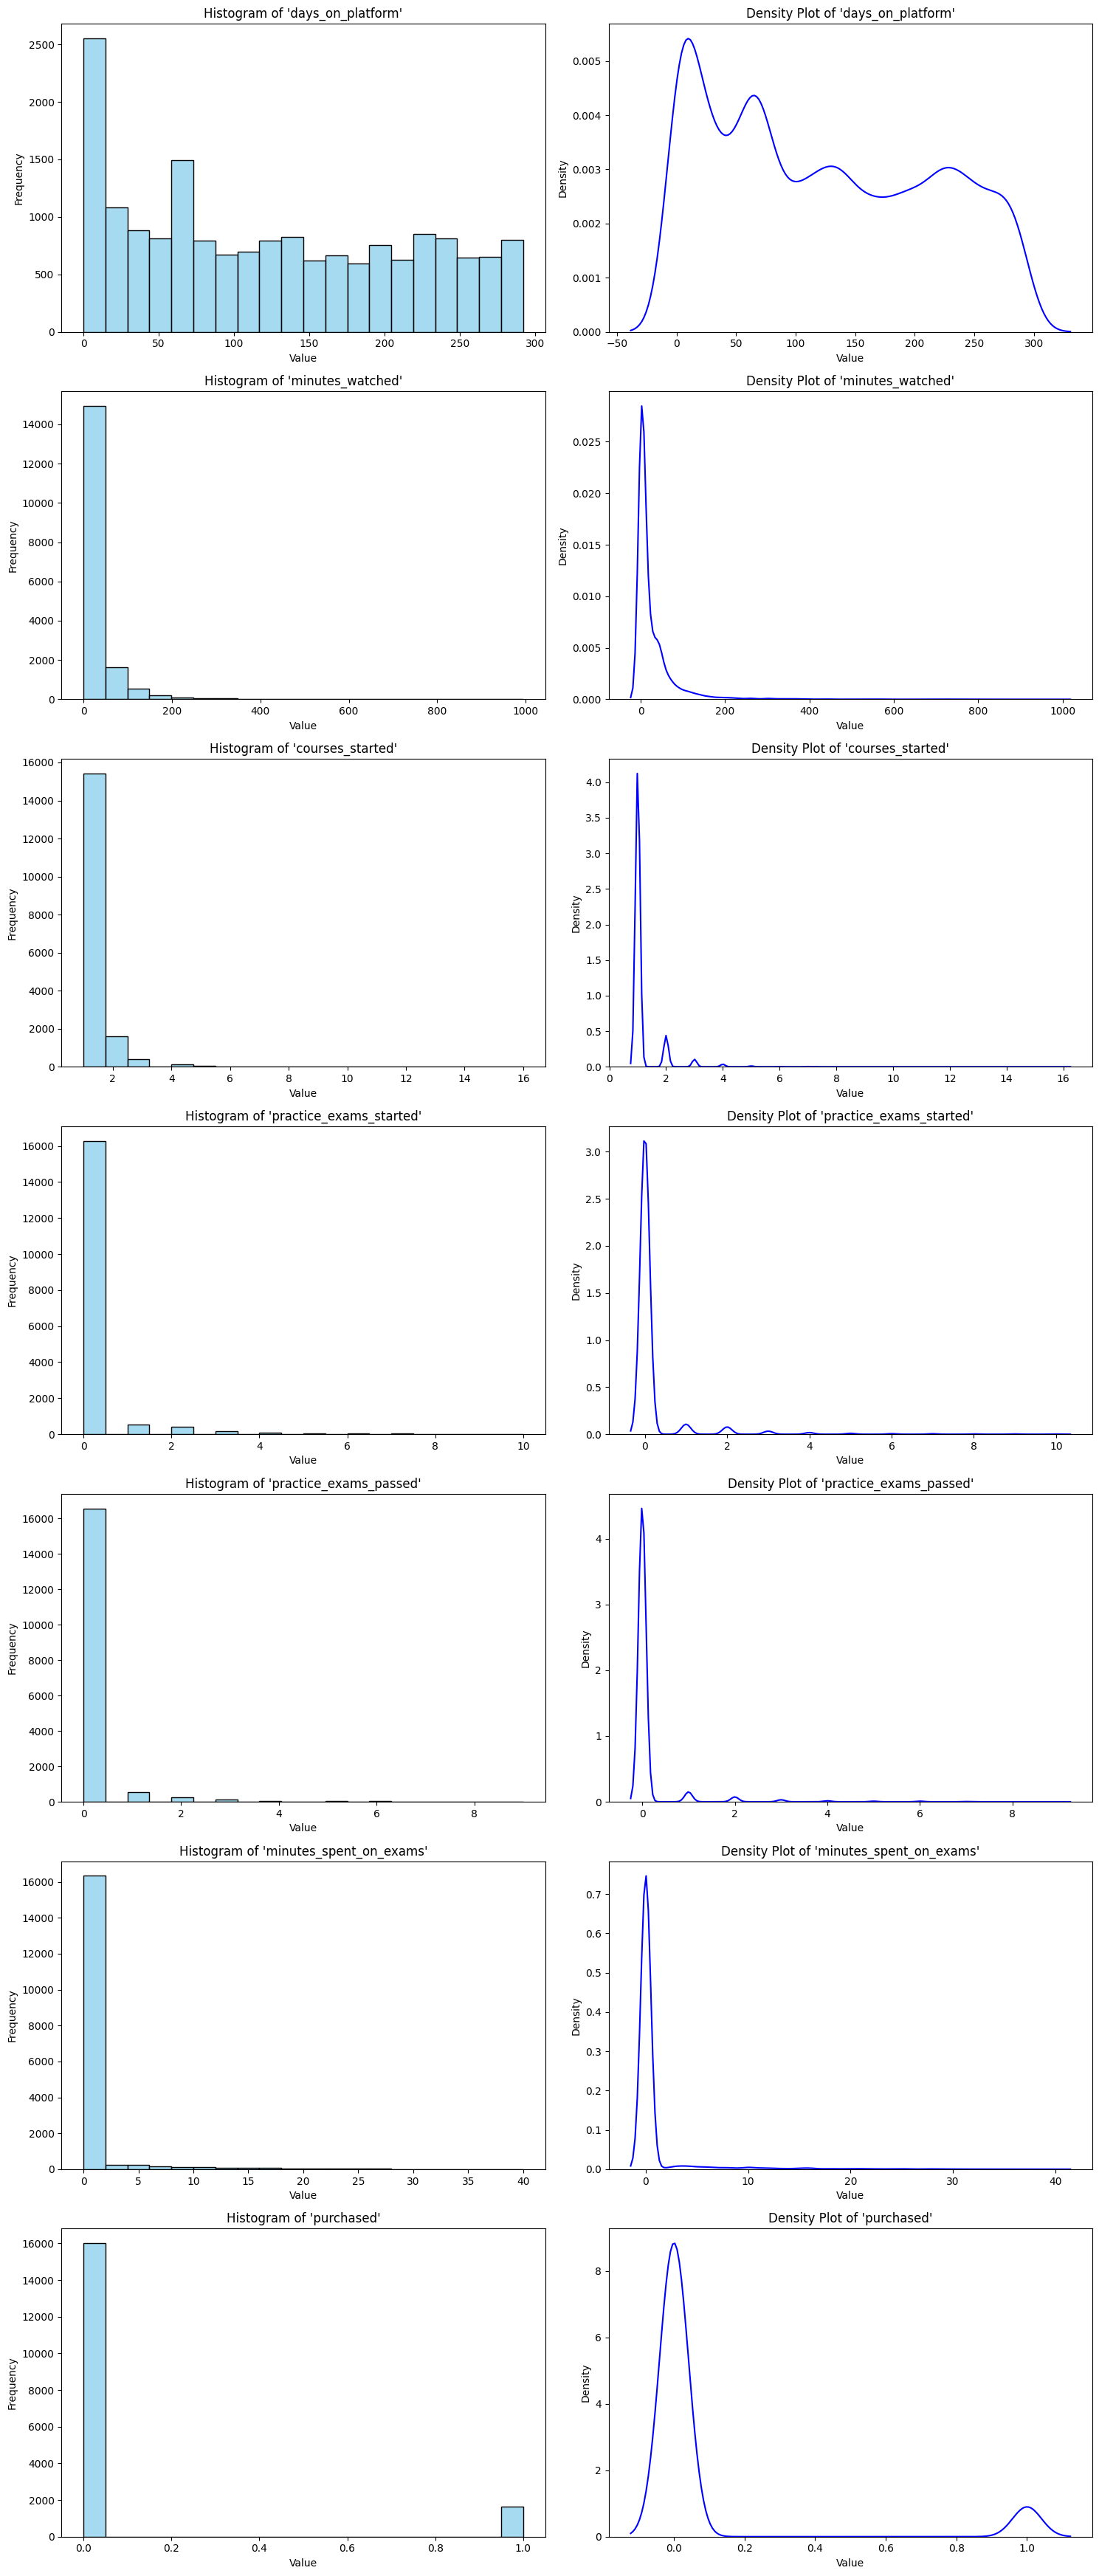

In [9]:
# Filter only numerical columns

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size

plt.figure(figsize=(15, len(numerical_features) * 5))

# Plot histograms and density plots for each numerical column after removing outliers

for i, feature in enumerate(numerical_features, 1):

    #Histogram

    plt.subplot(len(numerical_features), 2, 2 * i - 1)

    sns.histplot(df[feature], bins=20, kde=False, color='skyblue')

    plt.title(f"Histogram of '{feature}'")

    plt.xlabel("Value")

    plt.ylabel("Frequency")



    # Density Plot

    plt.subplot(len(numerical_features), 2, 2 * i)

    sns.kdeplot(df[feature], color='blue')

    plt.title(f"Density Plot of '{feature}'")

    plt.xlabel("Value")

    plt.ylabel("Density")

plt.tight_layout()

plt.show()

- Checking for Multicollinearity

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.tools.tools import add_constant

In [11]:
# Extracting only numerical columns from DataFrame

numerical_df = df.select_dtypes(include=[float, int])

# Function to calculate VIF for all columns

def calculate_vif(dataframe):

    # Adding constant column to deal with bias

    X = add_constant(dataframe)

    vif_data = pd.DataFrame()

    vif_data["Feature"] = dataframe.columns

    vif_data["VIF"] = [variance_inflation_factor(X.values, i + 1) for i in range(len(dataframe.columns))]

    return vif_data

# Calculate VIF for all columns

vif_df = calculate_vif(numerical_df)

print("VIF for each feature:")

print(vif_df)

VIF for each feature:
                  Feature       VIF
0        days_on_platform  1.211408
1         minutes_watched  1.565397
2         courses_started  1.350656
3  practice_exams_started  9.737179
4   practice_exams_passed  7.500314
5  minutes_spent_on_exams  3.198490
6               purchased  1.239725


In [12]:
# Continuously remove columns with high VIF

while True:
    vif_df = calculate_vif(df.select_dtypes(include=[float, int])) 
    print("VIF values after removing features:")

    print(vif_df)


    # If all columns are under the threshold, stop the iteration

    if vif_df["VIF"].max() <= 5:

        print("All features have VIF <= 5.")

        break

    # Find the column with highest VIF

    max_vif = vif_df["VIF"].max()

    feature_to_drop = vif_df.loc[vif_df["VIF"] == max_vif, "Feature"].values[0]

    print(f"Removing feature '{feature_to_drop}' with VIF: {max_vif}")

    # Drop the column with highest VIF from df directly

    df = df.drop(columns=[feature_to_drop])

    df.reset_index(drop=True, inplace=True)

    df=pd.DataFrame(df)

# Display data after removing high VIF columns

print("Data after removing features with high VIF:")

df

VIF values after removing features:
                  Feature       VIF
0        days_on_platform  1.211408
1         minutes_watched  1.565397
2         courses_started  1.350656
3  practice_exams_started  9.737179
4   practice_exams_passed  7.500314
5  minutes_spent_on_exams  3.198490
6               purchased  1.239725
Removing feature 'practice_exams_started' with VIF: 9.737178677903923
VIF values after removing features:
                  Feature       VIF
0        days_on_platform  1.208140
1         minutes_watched  1.564116
2         courses_started  1.350655
3   practice_exams_passed  2.470697
4  minutes_spent_on_exams  2.487234
5               purchased  1.238121
All features have VIF <= 5.
Data after removing features with high VIF:


,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,15.81,0
1,SG,260,1.7,1,0,16.00,0
2,TR,260,22.4,1,0,0.93,0
3,KE,259,18.8,1,1,14.63,0
4,IN,259,118.0,2,1,16.48,0
...,...,...,...,...,...,...,...
17625,EG,0,0.8,1,0,0.00,0
17626,IN,0,0.1,1,0,0.00,0
17627,CM,0,7.8,1,0,0.00,0
17628,CA,0,10.4,1,0,0.00,0


- Dealing with NaN Values

In [13]:
#Check Nulls

df.isna().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [14]:
# View rows where 'student_country' is NaN

df.loc[df['student_country'].isna()]

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
299,NaN,88,58.1,1,2,11.20,1
325,NaN,86,43.0,1,2,12.96,0
517,NaN,121,241.9,2,3,21.29,0
713,NaN,64,86.4,1,2,4.98,0
991,NaN,72,67.5,1,1,6.27,0
12232,NaN,84,6.2,1,0,0.00,0
12502,NaN,78,3.0,1,0,0.00,0
16815,NaN,11,8.2,1,0,0.00,0


In [15]:
# Fill NaN values in 'student_country' with 'NAM'

df['student_country'] = df['student_country'].fillna('NAM')

In [16]:
# check Nulls again

df.isna().sum()

student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

Splitting the Data

In [17]:
df['purchased'].value_counts()

purchased
0    16006
1     1624
Name: count, dtype: int64

In [18]:
# Splitting the Data

X=df.drop('purchased',axis=1)

y=df['purchased']


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)



#Splitted Data

print('x_train shape is ' , x_train.shape)

print('x_test shape is ' , x_test.shape)

print('y_train shape is ' , y_train.shape)

print('y_test shape is ' , y_test.shape)

x_train shape is  (14104, 6)
x_test shape is  (3526, 6)
y_train shape is  (14104,)
y_test shape is  (3526,)


In [20]:
y_train.value_counts()

purchased
0    12807
1     1297
Name: count, dtype: int64

In [21]:
print((y_train.value_counts() / len(y_train)).round(2))

purchased
0    0.91
1    0.09
Name: count, dtype: float64


- Encoding the Data

In [22]:
# Initialize OrdinalEncoder with handling of unknown values

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=170)

In [23]:
# Apply fit_transform on x_train to convert 'student_country' column to numeric values

x_train['student_country_enc'] = enc.fit_transform(x_train['student_country'].to_numpy().reshape(-1, 1))

In [24]:
# Apply transform on x_test to convert 'student_country' using the same encoder

x_test['student_country_enc'] = enc.transform(x_test['student_country'].to_numpy().reshape(-1, 1))

In [25]:
# Drop the original 'student_country' column after adding the encoded one

x_train = x_train.drop(columns=['student_country'])

x_test = x_test.drop(columns=['student_country'])

In [26]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14104 entries, 1990 to 14100
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   days_on_platform        14104 non-null  int64  
 1   minutes_watched         14104 non-null  float64
 2   courses_started         14104 non-null  int64  
 3   practice_exams_passed   14104 non-null  int64  
 4   minutes_spent_on_exams  14104 non-null  float64
 5   student_country_enc     14104 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 771.3 KB


In [27]:
x_train_array = np.asarray(x_train, dtype = 'float')

y_train_array = np.asarray(y_train, dtype = 'int')

x_test_array = np.asarray(x_test, dtype = 'float')

y_test_array = np.asarray(y_test, dtype = 'int')

In [28]:
# Display the shapes of the arrays

print(x_train_array.shape)

print(y_train_array.shape)

print(x_test_array.shape)

print(y_test_array.shape)

(14104, 6)
(14104,)
(3526, 6)
(3526,)


# 3)Machine Learning Models

### Logistic Regression

In [29]:
# Add a column of 1s (for adding constant to the model) to x_train_array and x_test_array

x_train_with_const = sm.add_constant(x_train_array)

x_test_with_const = sm.add_constant(x_test_array)



# Create a logistic regression model

log_reg = sm.Logit(y_train_array, x_train_with_const)

log_reg_results = log_reg.fit()


Optimization terminated successfully.
         Current function value: 0.153091
         Iterations 10


In [30]:
# Display the summary of results to understand the coefficients and statistics of the model

log_reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14104
Model:                          Logit   Df Residuals:                    14097
Method:                           MLE   Df Model:                            6
Date:                Wed, 04 Jun 2025   Pseudo R-squ.:                  0.5014
Time:                        17:19:58   Log-Likelihood:                -2159.2
converged:                       True   LL-Null:                       -4330.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1484      0.116     -9.912      0.000      -1.376      -0.921
x1            -0.0639      0.002    -30.584      0.000      -0.068      -0.060
x2             0.0124      0.001     17.224      0.000       0.011       0.014
x3             0.2729      0.077      3.559      0.000       0.123       0.423
x4             0.1163      0.076      1.521      0.128      -0.034       0.266
x5            -0.0782      0.016     -5.039      0.000      -0.109      -0.048
x6             0.0068      0.001      8.711      0.000       0.005       0.008
==============================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [31]:
# Use the trained model to predict probabilities on the test set

predicted_probabilities = log_reg_results.predict(x_test_with_const)

In [32]:
# Convert probabilities to 0 or 1

predicted_classes = np.where(predicted_probabilities > 0.5, 1, 0)

In [33]:
# Calculate confusion matrix

conf_matrix = confusion_matrix(y_test_array, predicted_classes)

# Display confusion matrix

print("Confusion Matrix:")

print(conf_matrix)


Confusion Matrix:
[[3164   35]
 [ 122  205]]


### KNN

In [34]:
# Define the parameter grid for the KNN classifier

parameters_knn = {

    'n_neighbors': range(1, 51),

    'weights': ['uniform', 'distance']

}

In [35]:
# Initialize GridSearchCV for the KNN classifier

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),

                               param_grid=parameters_knn,

                               scoring='accuracy',

                               cv=5,  # 5-fold cross-validation

                               n_jobs=-1)

# Fit GridSearchCV on the training data

grid_search_knn.fit(x_train_array, y_train_array)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [36]:
# Retrieve the best KNN model based on grid search

knn_clf = grid_search_knn.best_estimator_

In [37]:
# Make predictions on the test data using the optimized model

y_test_pred_knn = knn_clf.predict(x_test_array)

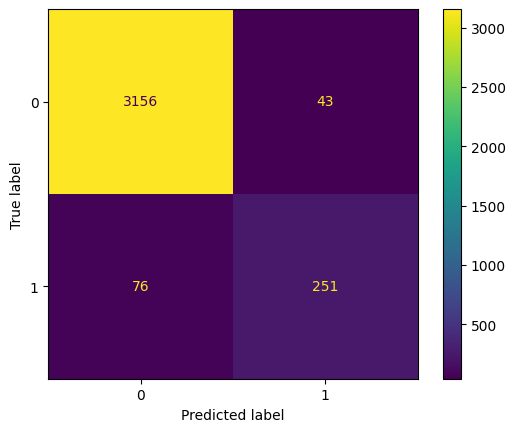

In [38]:
# Create and display the confusion matrix for KNN predictions

conf_matrix = confusion_matrix(y_test_array, y_test_pred_knn)

conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)

conf_matrix_display.plot()

In [39]:
# Print the classification report for the KNN model

print(classification_report(y_test_array, y_test_pred_knn))



# Print the best parameters found by GridSearchCV

print("Best parameters: ", grid_search_knn.best_params_)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3199
           1       0.85      0.77      0.81       327

    accuracy                           0.97      3526
   macro avg       0.92      0.88      0.89      3526
weighted avg       0.97      0.97      0.97      3526

Best parameters:  {'n_neighbors': 6, 'weights': 'uniform'}


### SVC

In [40]:
# Create an instance of MinMaxScaler to scale data between -1 and 1

scaler = MinMaxScaler(feature_range=(-1, 1))

# Apply fit_transform on training data

x_train_scaled = scaler.fit_transform(x_train_array)

# Apply the same transformation on test data

x_test_scaled = scaler.transform(x_test_array)


In [41]:
# Define parameters to try in Grid Search

parameters_svc = {

    'kernel': ['linear', 'poly', 'rbf'],  # Different kernels to try

    'C': np.arange(1, 11),

    'gamma': ['scale', 'auto']

}

In [42]:
# Create a GridSearch model with SVC

grid_search_svc = GridSearchCV(estimator=SVC(),

                               param_grid=parameters_svc,

                               scoring='accuracy',

                               cv=5,

                               n_jobs=-1)

# Train the model using training data

grid_search_svc.fit(x_train_scaled, y_train_array)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [43]:
# Find the best model with the best hyperparameters

svc_clf = grid_search_svc.best_estimator_

In [44]:
# Make predictions using the best model on the test data

y_test_pred_svc = svc_clf.predict(x_test_scaled)

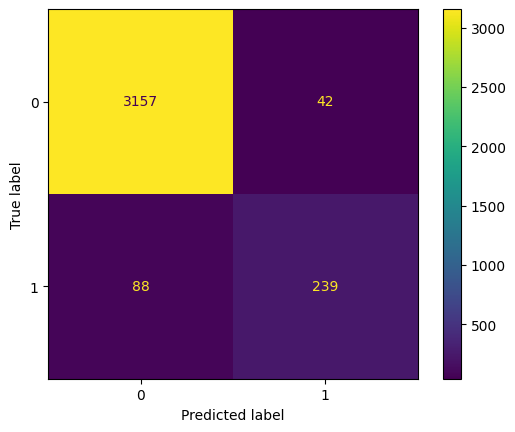

In [45]:
# Create and display confusion matrix

conf_matrix = confusion_matrix(y_test_array, y_test_pred_svc)

conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)

conf_matrix_display.plot()

In [46]:
# Print classification report

print(classification_report(y_test_array, y_test_pred_svc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3199
           1       0.85      0.73      0.79       327

    accuracy                           0.96      3526
   macro avg       0.91      0.86      0.88      3526
weighted avg       0.96      0.96      0.96      3526



### DecisionTreeClassifier

In [47]:
# Print best parameters found by GridSearch

print(" best parameters: ", grid_search_svc.best_params_)

 best parameters:  {'C': np.int64(4), 'gamma': 'scale', 'kernel': 'poly'}


In [48]:
# Define range for ccp_alpha parameter

parameters_dt = {

    'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]

}

In [49]:
# Create a DecisionTreeClassifier instance with random_state for randomness control

decision_tree = DecisionTreeClassifier(random_state=365)



# Create a GridSearch model to find the best ccp_alpha value

grid_search_dt = GridSearchCV(estimator=decision_tree,

                              param_grid=parameters_dt,

                              scoring='accuracy',

                              cv=5)  

In [50]:
# Train the model using unscaled training data

grid_search_dt.fit(x_train_array, y_train_array)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=365),
             param_grid={'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]},
             scoring='accuracy')

In [51]:
# Find the best model with the best ccp_alpha value

best_decision_tree = grid_search_dt.best_estimator_

print(" the best ccp_alpha value:", grid_search_dt.best_params_)

 the best ccp_alpha value: {'ccp_alpha': 0.002}


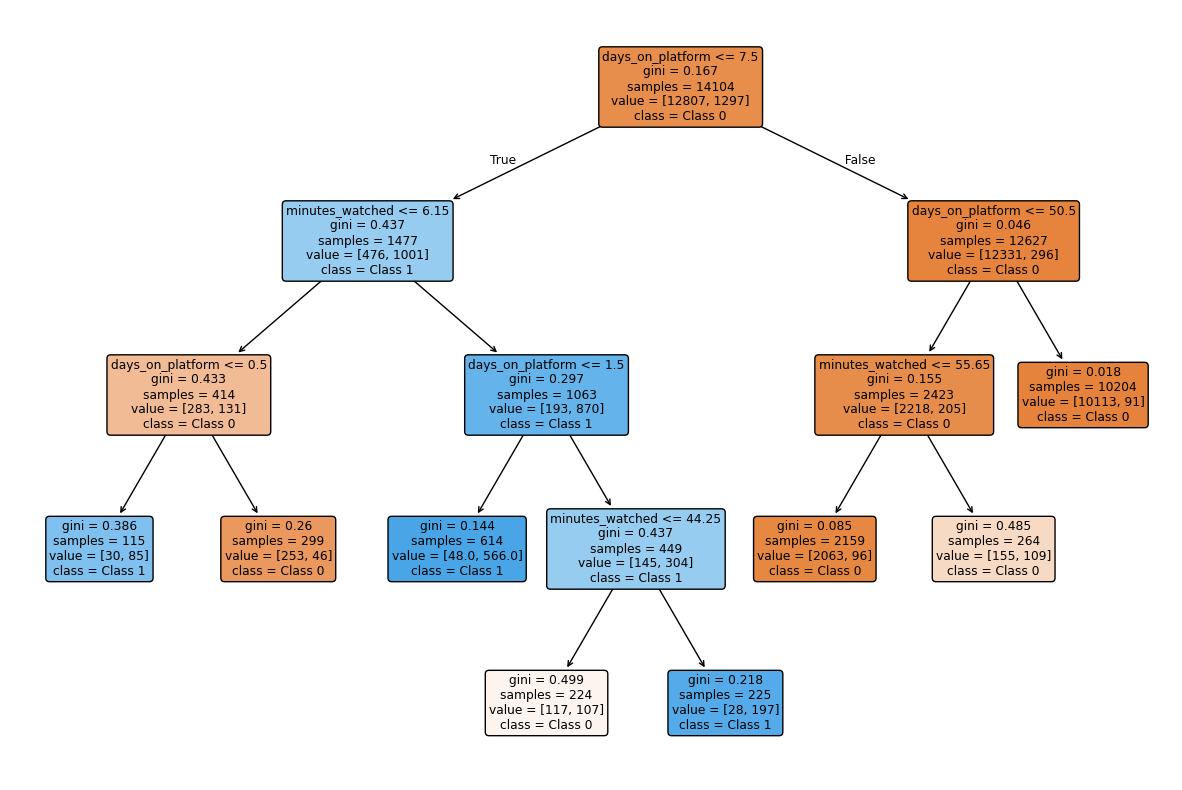

In [52]:
#Set figure size for display

plt.figure(figsize=(15, 10))



#plot_tree

plot_tree(best_decision_tree,

          filled=True,  

          feature_names=x_train.columns,  

          class_names=['Class 0', 'Class 1'],  

          rounded=True)

plt.show()

In [53]:
# Make predictions using the best model on the test data

y_test_pred_dt = best_decision_tree.predict(x_test_array)

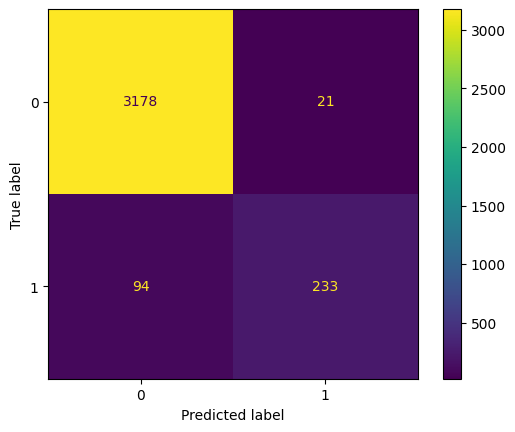

In [54]:
## Create and display confusion matrix

conf_matrix_dt = confusion_matrix(y_test_array, y_test_pred_dt)

conf_matrix_display_dt = ConfusionMatrixDisplay(conf_matrix_dt)

conf_matrix_display_dt.plot()

plt.show()

In [55]:
#Print classification report

print(classification_report(y_test_array, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3199
           1       0.92      0.71      0.80       327

    accuracy                           0.97      3526
   macro avg       0.94      0.85      0.89      3526
weighted avg       0.97      0.97      0.97      3526



### RandomForestClassifier

In [56]:
# Set the value of ccp_alpha from the best Decision Tree model from the previous step

best_ccp_alpha = grid_search_dt.best_params_['ccp_alpha']

# Create a RandomForestClassifier model with ccp_alpha and random_state

random_forest = RandomForestClassifier(ccp_alpha=best_ccp_alpha, random_state=365)

In [57]:
# Train the model using training data

random_forest.fit(x_train_array, y_train_array)

RandomForestClassifier(ccp_alpha=0.002, random_state=365)

In [58]:
# Make predictions on test data

y_test_pred_rf = random_forest.predict(x_test_array)

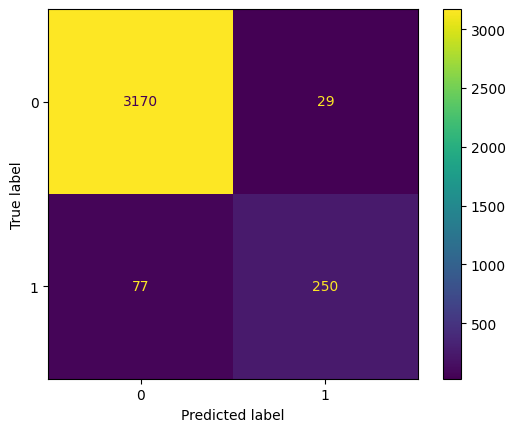

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3199
           1       0.90      0.76      0.83       327

    accuracy                           0.97      3526
   macro avg       0.94      0.88      0.90      3526
weighted avg       0.97      0.97      0.97      3526



In [59]:
# Create and display confusion matrix

conf_matrix_rf = confusion_matrix(y_test_array, y_test_pred_rf)

conf_matrix_display_rf = ConfusionMatrixDisplay(conf_matrix_rf)

conf_matrix_display_rf.plot()

plt.show()

#print classification report

print(classification_report(y_test_array, y_test_pred_rf))

In [60]:
# joblib.dump(random_forest, 'models/random_forest_model.pkl')
# joblib.dump(scaler, 'preprocessors/scaler.pkl')
# joblib.dump(enc, 'preprocessors/encoder.pkl')

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim

In [62]:
x_train_tensor = torch.tensor(x_train_array, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test_array, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_array, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test_array, dtype=torch.float32).unsqueeze(1)


In [63]:
class PurchaseNN(nn.Module):
    def __init__(self, input_dim):
        super(PurchaseNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(16, 1),
        )

    def forward(self, x):
        return self.model(x)

input_dim = x_train.shape[1]
model = PurchaseNN(input_dim)


In [64]:
neg=(y_train_tensor==0).sum()
pos=(y_train_tensor==1).sum()
pos_weight=torch.tensor([neg/pos],dtype=torch.float32)

In [65]:
loss_fn=nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [66]:
import random

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) 
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)


In [67]:
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    output = model(x_train_tensor)
    loss = loss_fn(output, y_train_tensor)

    loss.backward()
    optimizer.step()

    predicted = (output > 0.5).float()
    correct = (predicted == y_train_tensor).float().sum()
    acc = correct / y_train_tensor.shape[0]

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc.item():.4f}")



Epoch 1/20, Loss: 1.8368, Accuracy: 0.7131
Epoch 2/20, Loss: 1.5700, Accuracy: 0.7752
Epoch 3/20, Loss: 1.3773, Accuracy: 0.8159
Epoch 4/20, Loss: 1.1996, Accuracy: 0.8356
Epoch 5/20, Loss: 1.0714, Accuracy: 0.8473
Epoch 6/20, Loss: 0.9593, Accuracy: 0.8499
Epoch 7/20, Loss: 0.9036, Accuracy: 0.8586
Epoch 8/20, Loss: 0.8766, Accuracy: 0.8560
Epoch 9/20, Loss: 0.8056, Accuracy: 0.8649
Epoch 10/20, Loss: 0.7637, Accuracy: 0.8688
Epoch 11/20, Loss: 0.7630, Accuracy: 0.8724
Epoch 12/20, Loss: 0.7304, Accuracy: 0.8798
Epoch 13/20, Loss: 0.7285, Accuracy: 0.8809
Epoch 14/20, Loss: 0.7443, Accuracy: 0.8885
Epoch 15/20, Loss: 0.7070, Accuracy: 0.8922
Epoch 16/20, Loss: 0.7138, Accuracy: 0.8917
Epoch 17/20, Loss: 0.7127, Accuracy: 0.8972
Epoch 18/20, Loss: 0.6740, Accuracy: 0.9014
Epoch 19/20, Loss: 0.6740, Accuracy: 0.9007
Epoch 20/20, Loss: 0.6846, Accuracy: 0.9043


In [68]:
torch.save(model.state_dict(), 'models/purchase_nn.pth')

In [69]:
model.eval()
with torch.no_grad():
    test_output = model(x_test_tensor)
    test_predicted = (test_output > 0.5).float()
    test_correct = (test_predicted == y_test_tensor).float().sum()
    test_acc = test_correct / y_test_tensor.shape[0]

print(f"Test Accuracy: {test_acc.item():.4f}")


Test Accuracy: 0.9175


# onnx

In [70]:
import torch.onnx

dummy_input = torch.randn(1, input_dim)

# export the model

torch.onnx.export(model,
                 dummy_input,
                'models/purchase_nn.onnx',
                export_params=True,
                opset_version=11,
                do_constant_folding=True,
                input_names=['input'],
                output_names=['output'],
                dynamic_axes={'input': {0: 'batch_size'},
                'output': {0: 'batch_size'}})
